# Problem Definition

The prototype problem is Newton's laws and universal gravitation -- a test mass is falling freely under the influence of gravity of a central point mass. Universal Gravitation says that the force between two objects is exactly attractive (force on one is exactly towards other), proportional to the product of the masses, and inversely proportional to the square of the distance:

$$\begin{eqnarray*}
\vec{F}&=&\underbrace{G}_{\mbox{Proportionality constant}}\overbrace{{Mm}}^{\mbox{masses}}\underbrace{\frac{1}{r^2}}_{\mbox{inverse square of distance}}\overbrace{\frac{-\vec{r}}{r}}^{\mbox{direction}}\\
   &=&-\frac{GMm\vec{r}}{r^3}
\end{eqnarray*}$$

Newton's second law says that the small mass responds to the force by accelerating in the direction of the force:

$$\begin{eqnarray*}
\vec{F}&=&m\vec{a} \\
\vec{a}&=&\frac{\vec{F}}{m}
\end{eqnarray*}$$

Newton's third law says that the force on the big mass is equal and opposite to the force on the small mass. However, we consider the big mass to be so much bigger than the small mass, that the equal force causes a negligible acceleration of the big mass. We are only going through this math so that we never have to think of it again.

$$\begin{eqnarray*}
\vec{F}_{M}&=&-\vec{F}_{m} \\
M\vec{a}_{M}&=&-m\vec{a}_{m} \\
\vec{a}_{M}&=&-\frac{m}{M}\vec{a}_{m}
\end{eqnarray*} \\
M\gg m\mbox{, so } \\
$$
$$
\begin{eqnarray*}
\frac{m}{M}&\approx&0 \\
 \vec{a}_M&=&-\frac{m}{M}\vec{a}_m \\
 &\approx&(0)\vec{a}_m \\
 &\approx&\vec{0}
\end{eqnarray*}$$

Back to the small mass: Combining the force with the second law, we see that the mass of the small mass cancels out to get:

$$\begin{eqnarray*}
\vec{F}&=&m\vec{a} \\
\vec{a}&=&\frac{\vec{F}}{m}
       &=&-\frac{GMm\vec{r}}{r^3}\frac{1}{m}
       &=&-\frac{GM\vec{r}}{r^3}
\end{eqnarray*}$$

It is operationally much more convenient to think of the product $GM$ as a single parameter $\mu$, since it is much easier to determine $\mu$ from motion than either $G$ or $M$ independently. Measuring $G$ requires accurately measuring the gravity exerted by a mass that can fit in a laboratory. Measuring $M$ would require producing a large enough force on a planet in order to produce a measurable acceleration.

$$
\vec{a}=-\frac{\mu\vec{r}}{r^3}
$$

Now the definition of acceleration is the second derivative of position with respect to time. In a coordinate system where the big mass is at the origin, the vector separating the masses $\vec{r}_{Mm}$ becomes the position vector of the small mass $\vec{r}$. We then can put this into the language of differential equations:

$$\begin{eqnarray*}
\vec{a}&=&-\frac{\mu\vec{r}}{r^3} \\
\frac{d^2\vec{r}}{dt^2}&=&-\frac{\mu\vec{r}}{r^3}
\end{eqnarray*}$$

Now any second order equation can be cast as a system of first order equations by introducing another vector to the state -- the velocity. We end up with:

$$
\begin{eqnarray*}
\frac{d\vec{r}}{dt}&=&\vec{v} \\
\frac{d\vec{v}}{dt}&=&\vec{a} \\
                   &=&-\frac{\mu\vec{r}}{r^3} \\
\end{eqnarray*}$$

We could do the same thing with any higher-order equation by introducing enough extra state. Any order vector differential equation can be expressed as a system of first-order vector differential equations, and therefore we only need a first-order solver. Further, any vector first-order equation can be expressed as a system of scalar first-order equations, so we only need a scalar first-order solver.

Any system which can be described by differential equations therefore has a state vector. An $n$-order differential equation of motion in $m$-dimensional space will be a system of $n \times m$ scalar equations. The equations are allowed to depend on any combination of state vector elements, and perhaps time. In general it can be expressed as:

$$\frac{d\vec{x}}{dt}=\vec{f}(\vec{x},\vec{k},t)$$

where:

* $\vec{x}$ is the state vector.
* $\vec{k}$ is a vector of parameters. In the example problem, this would be $\mu$.
* $t$ is *time*, the independent variable in the equations of motion. The gravity function and many other physical laws do not depend on time, but it is convenient to pass along $t$ so that the function can use it for example as a switch -- say for instance we are modeling a spacecraft, and the thruster on the spacecraft is thrusting in this direction from time $t=0$ to $t=1$, and is off at all other times. Physical laws tend to not use $t$, but control programs tend to love to use $t$.
* $\vec{f}()$ is the equations of motion. This function returns a vector which is the derivative of the state vector with respect to time. This means that both the numbers of components and units of each component must be correct. We can think of this equivalently as a vector function or a system of scalar functions, one for each component of the state vector. Any component of the result can depend on any combination of elements of $\vec{x}$, $\vec{k}$, or scalar $t$. Strictly speaking, $\vec{k}$ could have been hard-coded into the equations, but breaking it out like this makes it cleaner to generalize into computer code.

We then solve this differential equation given an initial condition. Differential equations are noted for being extremely difficult to solve symbolically -- the two-body gravity equation is right on the edge of solvability. It required the genius of Newton to solve it, and he had to invent calculus from scratch to do so. More complicated systems are generally *not* solvable in a symbolic closed-form sense.

So, we take the time-honored method of *not* solving it. We do an end run around the symbolic part by doing the equation *numerically*. Remember the definition of a derivative:

$$\frac{dx}{dt}=\lim_{dt \to 0}\frac{x(t+dt)-x(t)}{dt}$$

We can rearrange this equation to get at the value of the function $x$ a small time into the future, like this:

$$\begin{eqnarray*}
\frac{dx}{dt}&=&\lim_{dt \to 0}\frac{x(t+dt)-x(t)}{dt}\\
\frac{dx}{dt}&\approx&\frac{x(t+dt)-x(t)}{dt} \\
dt\frac{dx}{dt}&\approx&x(t+dt)-x(t) \\
x(t)+dt\frac{dx}{dt}&\approx&x(t+dt) \\
x(t+dt)&\approx&x(t)+dt\frac{dx}{dt} \\
\end{eqnarray*}$$

When we threw away the limit, we went from an exact equation to an approximate one. So, we hope that our equation is sufficiently well-behaved, and we use a small enough $dt$, so that the approximate value of $x(t+dt)$ is "good enough". There is a whole theory on exactly what "good enough" means, called [numerical analysis](https://en.wikipedia.org/wiki/Numerical_analysis), which we won't go into. Actually implementing this is the most obvious way of doing a numerical integrator. In fact, I wrote my first numerical integrator before I even knew what one was. This simple method has been named by history for whatever reason as the [Euler method](https://en.wikipedia.org/wiki/Euler_method).

In [1]:
def euler(F,dt,x0,k=None,t0=0,nstep=1):
    """
    Take a fixed number of steps in a numerical integration of a differential
    equation using the Euler method.
    :param F: First-order vector differential equation, in the form of a Python
       function. This function is in the form:
       F(x,k,t)
       where: 
         :param x: is the state or group of states vectors at the current
                   time. The state may be a scalar, 1D numpy array, a 1xn
                   numpy array holding a single column vector, or a 2D numpy array
                   holding a set of vectors.
         :param k: is the parameter vector, which may be any type, including a scalar or None.
         :param t: is the current time, which will always be a scalar.
       This function must produce a result with the same dimensionality as x. Note that while euler() doesn't
       care about the form of the parameters, F() might. It is up to the user of euler() to pass in a function F() which
       understands the parameters x and k which the user passes. The function must take all three parameters, but it 
       doesn't have to use all of them.
    :param dt: Time step size
    :param x0: Initial state vector. May be a scalar, 1D numpy array, 1xn numpy array holding a column vector, or a 2D
               numpy array holding a set of vectors.
    :param k: Optional parameter vector
    :param t0: Optional initial time value. This is only used to pass the current time to F() in case it needs it.
    :param nstep: Number of steps to take
    :return: The new value of the state vector, same dimensionality as the input x0
    """
    ddt=dt/nstep
    x1=x0*1
    for i in range(nstep):
        x1+=ddt*F(x1,k,t0+ddt*i)
    return x1  

The Euler integrator, while straightforward and easy to understand, is known to be one of the weakest ones. Numerical analysis shows that it has an error size of order $O(dt)$. This means that in order to cut the error in half, you have to cut the step size in half as well, or in other words take twice as many steps to cover the same time.

We will often come across problems where this error result will require taking an impractically large number of steps. More numerical analysis will allow us to construct the [fourth-order Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge%E2%80%93Kutta_method), an integrator with an error on the order of $O(dt^4)$. This means that halving the step size cuts the error to $1/2^4=1/16$. We do this by breaking each step into a number of substeps, figuring out the derivative at each substep, and figuring the derivative across the whole step as the weighted average of those derivatives.

In particular, we do this:

$$\begin{eqnarray*}
d\vec{x}_1&=&dtF(\vec{x}& & &,&\vec{k},t& & &) \\
d\vec{x}_2&=&dtF(\vec{x}&+&\frac{d\vec{x}_1}{2}&,&\vec{k},t&+&\frac{dt}{2}&) \\
d\vec{x}_3&=&dtF(\vec{x}&+&\frac{d\vec{x}_2}{2}&,&\vec{k},t&+&\frac{dt}{2}&) \\
d\vec{x}_4&=&dtF(\vec{x}&+&d\vec{x}_3&,&\vec{k},t&+&dt&)
\end{eqnarray*}
$$
$$
\vec{x}^+=\vec{x}+\frac{d\vec{x}_1+2d\vec{x}_2+2d\vec{x}_3+d\vec{x}_4}{6}
$$

This does:

1. Figure the slope at the initial point, and from that the amount of change by multiplying the slope by the total time step.
2. Figure the slope half way along the step, at a point determined from the initial point plus half of the change from step 1. Figure the change from this slope across the whole step.
3. Figure the slope half way along the step, at a point determined from the initial point plus half the change from step 2. Figure the change from this slope across the whole step.
4. Figure the slope all the way along the step, at a point determined from the initial point plus all of the change from step 3. Figure the change from across this slope across the whole step.

Finally, compute the final change as the weighted average of each change, weighting changes 2 and 3 twice as heavily as 1 and 4.

In terms of computational effort, to cut the error by $1/16$, we need to take two RK4 steps, each of which takes 4 evaluations of the physics function (which is assumed to dominate the computational effort), for a total of 8 evaluations. To do the same with the Euler method, we need to take 16 steps, which requires 16 evaluations. So, even though RK4 is more complicated, its error properties may make it more efficient since we can take larger (and therefore fewer) steps to cover the same time.

In [2]:
def rk4(F,dt,x0,k=None,t0=0,nstep=1):
    """
    Take a fixed number of steps in a numerical integration of a differential equation using the 
    fourth-order Runge-Kutta method. This function has exactly the same interface as euler().
    """
    ddt=dt/nstep
    xp=x0*1
    for i in range(nstep):
        dx1=ddt*F(xp      ,k,t0+ddt*i      )
        dx2=ddt*F(xp+dx1/2,k,t0+ddt*i+ddt/2)
        dx3=ddt*F(xp+dx2/2,k,t0+ddt*i+ddt/2)
        dx4=ddt*F(xp+dx3  ,k,t0+ddt*i+ddt  )
        xp=xp+(dx1+2*dx2+2*dx3+dx4)/6
    return xp

We will try an example from Wikipedia:

$$\frac{dx}{dt}=x$$

with an initial condition:

$$\left.x(t)\right|_{t=0}=1$$

The exact answer is: 

$$x=e^t$$

We will compare the answers given by the Euler and Runge-Kutta methods at different step sizes.

<IPython.core.display.Javascript object>


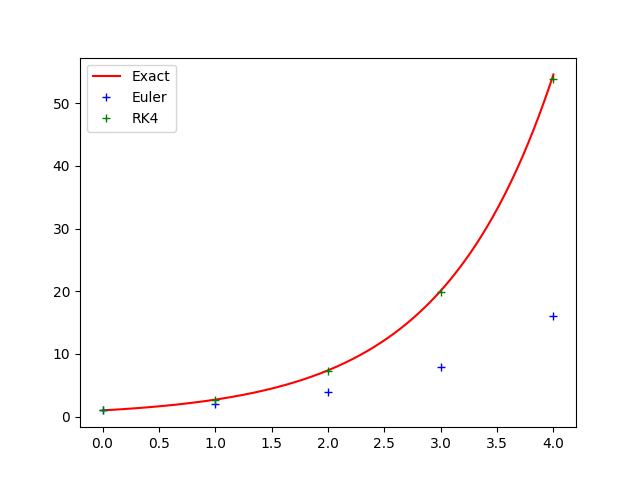

<IPython.core.display.Javascript object>


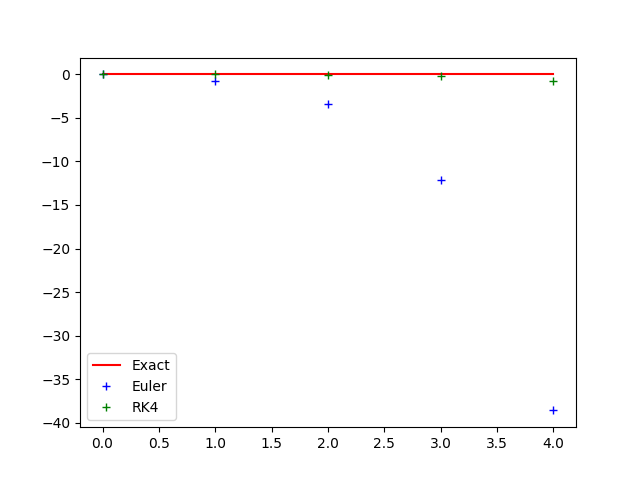

Euler final error: -38.598150
RK4   final error: -0.794906


In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def Fexample(x,k,t):
    return x

x0=1
t1=4
dt=1
t=np.arange(0,t1+dt,dt)
xe=np.zeros(int(t1/dt+1))
xrk=np.zeros(int(t1/dt+1))
xe[0]=x0
xrk[0]=x0

for i in range(int(t1/dt)):
    xe [i+1]=euler(Fexample,dt,xe [i])
    xrk[i+1]=rk4  (Fexample,dt,xrk[i])
    
plt.figure("dt=1")
plt.plot(np.arange(t1*100+1)/100,np.exp(np.arange(t1*100+1)/100),'r-',label='Exact')
plt.plot(t,xe,'b+',label='Euler')
plt.plot(t,xrk,'g+',label='RK4')
plt.legend()
plt.figure("error,dt=1")
plt.plot(t,t*0,'r-',label='Exact')
plt.plot(t,xe-np.exp(t),'b+',label='Euler')
plt.plot(t,xrk-np.exp(t),'g+',label='RK4')
print("Euler final error: %f"%(xe [-1]-np.exp(t[-1])))
print("RK4   final error: %f"%(xrk[-1]-np.exp(t[-1])))
plt.legend()
plt.show()

Both integrators are noticeably below the true value, but the Euler integrator is obviously far worse. Now we try it again, with half the step size.

<IPython.core.display.Javascript object>


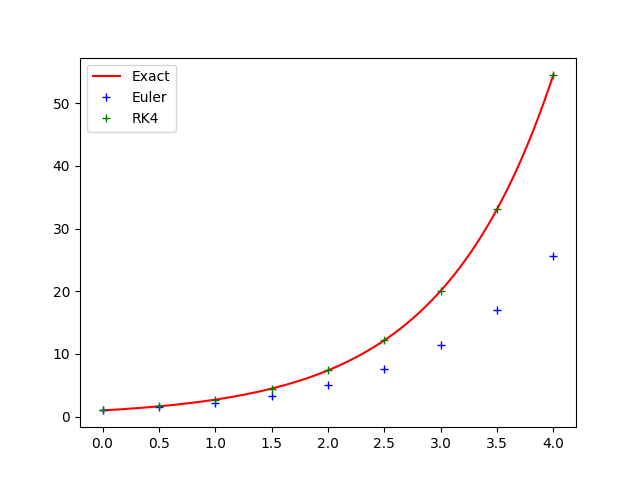

<IPython.core.display.Javascript object>


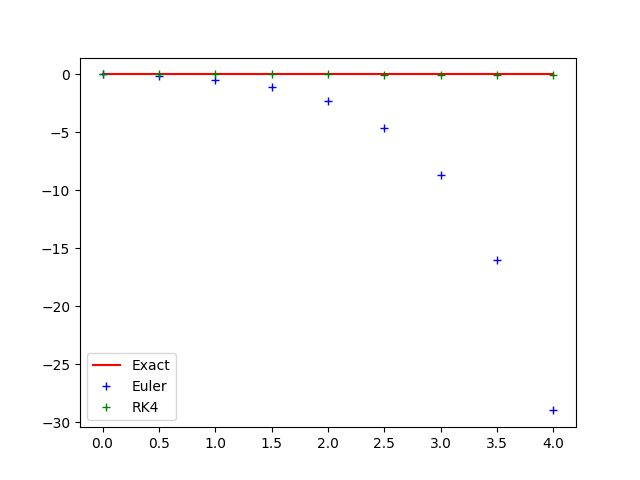

Euler final error: -28.969244
RK4   final error: -0.075132


In [11]:
dt=0.5
t=np.arange(0,t1+dt,dt)
xe=np.zeros(int(t1/dt+1))
xrk=np.zeros(int(t1/dt+1))
xe[0]=x0
xrk[0]=x0

for i in range(int(t1/dt)):
    xe [i+1]=euler(Fexample,dt,xe [i])
    xrk[i+1]=rk4  (Fexample,dt,xrk[i])
    
plt.figure("dt=0.5")
plt.plot(np.arange(t1*100+1)/100,np.exp(np.arange(t1*100+1)/100),'r-',label='Exact')
plt.plot(t,xe,'b+',label='Euler')
plt.plot(t,xrk,'g+',label='RK4')
plt.legend()
plt.figure("error,dt=0.5")
plt.plot(t,t*0,'r-',label='Exact')
plt.plot(t,xe-np.exp(t),'b+',label='Euler')
plt.plot(t,xrk-np.exp(t),'g+',label='RK4')
print("Euler final error: %f"%(xe [-1]-np.exp(t[-1])))
print("RK4   final error: %f"%(xrk[-1]-np.exp(t[-1])))
plt.legend()
plt.show()

Note that we don't even get our expected order improvement here. We expected the error to be about half as much for Euler, and about 1/16 as much for RK4. We got an improvement of maybe 25% for Euler, and about 90% for RK4